## **Install library `PBHBeta`**

In [ ]:
pip install -i https://test.pypi.org/simple/ PBHBeta

Looking in indexes: https://test.pypi.org/simple/


##### Import modules from `PBHBeta`

In [ ]:
from PBHBeta import *
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
print(len(functions.put_M_array(1e20)))

1352


/usr/local/lib/python3.10/dist-packages/PBHBeta/functions.py:112: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 = beta0 * b * (1. - time / Delta_t) ** (1. / 3)


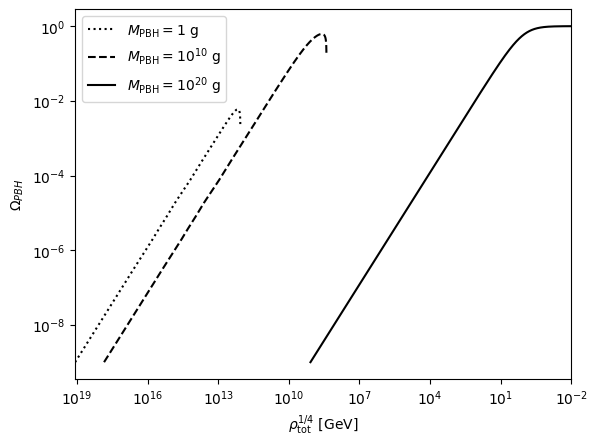

In [ ]:
M_tot = constraints.M_tot
omega=1./3.

k_end_over_k_rad = functions.k_end_over_k(M_tot, omega)
rho_end_inf = 3.*constants.M_pl**2.*constants.H_end**2.

log10_M_tot = np.linspace(0,20,1000)
rho_form_rad = functions.rho_f(M_tot,omega)
ln_den_end = np.log(constants.rho_end)

ln_den_try_1 = np.linspace(np.log(rho_form_rad[-1]),np.log(constants.rho_end),10000)
sol_try_1 = functions.solve_ivp(functions.diff_rad,(np.log(rho_form_rad[-1]),ln_den_end),np.array([1.,0.]),events=functions.end_evol,t_eval=ln_den_try_1,args=(M_tot[-1],1e-9),method = "DOP853")
Delta_t_try_1 = constants.t_pl*(M_tot[-1]/constants.M_pl_g)**3
Om_try_1 =  1e-9*sol_try_1.y[0]*(1.-sol_try_1.y[1]/Delta_t_try_1)**(1./3)

ln_den_try_2 = np.linspace(np.log(rho_form_rad[0]),np.log(constants.rho_end),10000)
sol_try_2 = functions.solve_ivp(functions.diff_rad,(np.log(rho_form_rad[0]),ln_den_end),np.array([1.,0.]),events=functions.end_evol,t_eval=ln_den_try_2,args=(M_tot[0],1e-9),method = "DOP853")
Delta_t_try_2 = constants.t_pl*(M_tot[0]/constants.M_pl_g)**3
Om_try_2 =  1e-9*sol_try_2.y[0]*(1.-sol_try_2.y[1]/Delta_t_try_2)**(1./3)

ln_den_try_3 = np.linspace(np.log(rho_form_rad[200]),np.log(constants.rho_end),10000)
sol_try_3 = functions.solve_ivp(functions.diff_rad,(np.log(rho_form_rad[200]),ln_den_end),np.array([1.,0.]),events=functions.end_evol,t_eval=ln_den_try_3,args=(M_tot[200],1e-9),method = "DOP853")
Delta_t_try_3 = constants.t_pl*(M_tot[200]/constants.M_pl_g)**3
Om_try_3 =  1e-9*sol_try_3.y[0]*(1.-sol_try_3.y[1]/Delta_t_try_3)**(1./3)


plt.loglog(np.exp(sol_try_2.t)**(1/4),Om_try_2, "k:", label=r"$M_{\rm PBH}= 1\ \rm{g}$")
plt.loglog(np.exp(sol_try_3.t)**(1/4),Om_try_3, "k--", label=r"$M_{\rm PBH}= 10^{10}\ \rm{g}$")
plt.loglog(np.exp(sol_try_1.t)**(1/4),Om_try_1,"k", label=r"$M_{\rm PBH}= 10^{20}\ \rm{g}$")


plt.xlim([np.exp(sol_try_2.t[1])**(1/4),np.exp(sol_try_1.t[-1])**(1/4)])
plt.ylabel(r"$\Omega_{PBH}$")
plt.xlabel(r"$\rho_{\rm tot}^{1/4}\ [\rm{GeV}]$")
plt.legend()
plt.show()

In [ ]:
betas = functions.Betas_DM(M_tot)[1]
betas_relic = functions.Betas_DM(M_tot)[3]
betas_bbn = functions.Betas_BBN(M_tot,omega)[1]
betas_sd = functions.Betas_SD(M_tot,omega)[1]
betas_an = functions.Betas_CMB_AN(M_tot,omega)[1]
betas_grb1 = functions.Betas_GRB(M_tot,omega)[2]
betas_grb2 = functions.Betas_GRB(M_tot,omega)[3]
betas_reio = functions.Betas_Reio(M_tot,omega)[1]
betas_lsp = functions.Betas_LSP(M_tot)[1]
betas_full = functions.get_Betas_full(M_tot)

In [ ]:
M_n = functions.Betas_DM(M_tot)[0]
M_relic = functions.Betas_DM(M_tot)[2]
M_bbn = functions.Betas_BBN(M_tot,omega)[0]
M_an = functions.Betas_CMB_AN(M_tot,omega)[0]
M_grb1 = functions.Betas_GRB(M_tot,omega)[0]
M_grb2 = functions.Betas_GRB(M_tot,omega)[1]
M_reio = functions.Betas_Reio(M_tot,omega)[0]
M_lsp = functions.Betas_LSP(M_tot)[0]

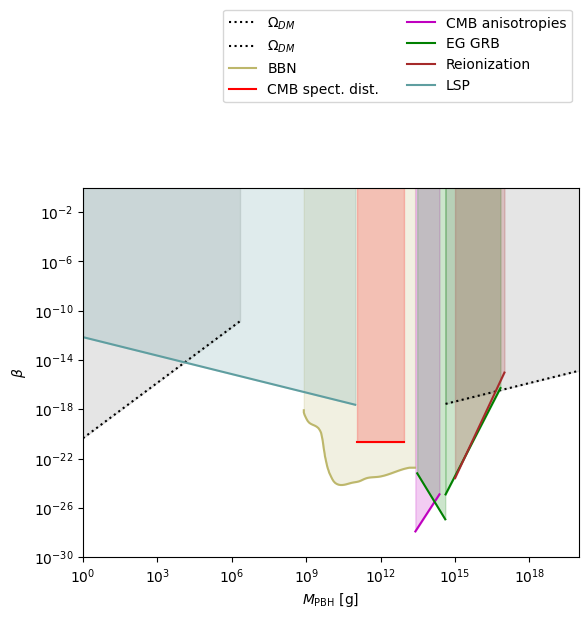

In [ ]:
plt.loglog(functions.Betas_DM(M_tot)[0],functions.Betas_DM(M_tot)[1], "k:",label=r"$\Omega_{DM}$")
plt.fill_between(functions.Betas_DM(M_tot)[0],functions.Betas_DM(M_tot)[1], functions.Betas_DM(M_tot)[1]*0+10, color='grey',alpha=0.2)

plt.loglog(functions.Betas_DM(M_tot)[2],functions.Betas_DM(M_tot)[3], "k:",label=r"$\Omega_{DM}$")
plt.fill_between(functions.Betas_DM(M_tot)[2],functions.Betas_DM(M_tot)[3], functions.Betas_DM(M_tot)[3]*0+10, color='grey',alpha=0.2)

plt.loglog(functions.Betas_BBN(M_tot,omega)[0],functions.Betas_BBN(M_tot,omega)[1],color = "darkkhaki",label = "BBN")
plt.fill_between(functions.Betas_BBN(M_tot,omega)[0],functions.Betas_BBN(M_tot,omega)[1], functions.Betas_BBN(M_tot,omega)[1]*0+10, color='darkkhaki',alpha=0.2)

plt.loglog(functions.Betas_SD(M_tot,omega)[0],functions.Betas_SD(M_tot,omega)[1], "r", label="CMB spect. dist.")
plt.fill_between(functions.Betas_SD(M_tot,omega)[0], functions.Betas_SD(M_tot,omega)[1], functions.Betas_SD(M_tot,omega)[1]*0+10, color ="r",alpha=0.2)

plt.loglog(functions.Betas_CMB_AN(M_tot,omega)[0],functions.Betas_CMB_AN(M_tot,omega)[1], "m", label="CMB anisotropies")
plt.fill_between(functions.Betas_CMB_AN(M_tot,omega)[0], functions.Betas_CMB_AN(M_tot,omega)[1], functions.Betas_CMB_AN(M_tot,omega)[1]*0+10, color='m',alpha=0.2)

plt.loglog(functions.Betas_GRB(M_tot,omega)[0],functions.Betas_GRB(M_tot,omega)[2], color = "g", label="EG GRB")
plt.fill_between(functions.Betas_GRB(M_tot,omega)[0], functions.Betas_GRB(M_tot,omega)[2], functions.Betas_GRB(M_tot,omega)[2]*0+10, color='g',alpha=0.2)
plt.loglog(functions.Betas_GRB(M_tot,omega)[1],functions.Betas_GRB(M_tot,omega)[3], color = "g")
plt.fill_between(functions.Betas_GRB(M_tot,omega)[1], functions.Betas_GRB(M_tot,omega)[3], functions.Betas_GRB(M_tot,omega)[3]*0+10, color='g',alpha=0.2)

plt.loglog(functions.Betas_Reio(M_tot,omega)[0],functions.Betas_Reio(M_tot,omega)[1], color = "brown",label = "Reionization")
plt.fill_between(functions.Betas_Reio(M_tot,omega)[0], functions.Betas_Reio(M_tot,omega)[1], functions.Betas_Reio(M_tot,omega)[1]*0+10, color='brown',alpha=0.2)

plt.loglog(functions.Betas_LSP(M_tot)[0], functions.Betas_LSP(M_tot)[1], color = "cadetblue",label = "LSP")
plt.fill_between(functions.Betas_LSP(M_tot)[0], functions.Betas_LSP(M_tot)[1], functions.Betas_LSP(M_tot)[1]*0+10, color='cadetblue',alpha=0.2)

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.xlim([1,1e20])
plt.ylim([1e-30,1])

plt.legend(ncol=2,bbox_to_anchor=(1, 1.5))
plt.show()

In [ ]:
delta_c = 0.41
sigma = np.array(functions.inverse_error(betas,delta_c))
sigma_relic = np.array(functions.inverse_error(betas_relic,delta_c))
sigma_bbn = np.array(functions.inverse_error(betas_bbn,delta_c))
sigma_sd = np.array(functions.inverse_error(betas_sd,delta_c))
sigma_an = np.array(functions.inverse_error(betas_an,delta_c))
sigma_grb1 = np.array(functions.inverse_error(betas_grb1,delta_c))
sigma_grb2 = np.array(functions.inverse_error(betas_grb2,delta_c))
sigma_reio = np.array(functions.inverse_error(betas_reio,delta_c))
sigma_lsp = np.array(functions.inverse_error(betas_lsp,delta_c))
sigma_tot = np.array(functions.inverse_error(betas_full,delta_c))

In [ ]:
A = constants.A

<ipython-input-11-94742bc15222>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.loglog(functions.k_rad(M_bbn),A*sigma_bbn**2, "r", label="BBN",color = "darkkhaki")


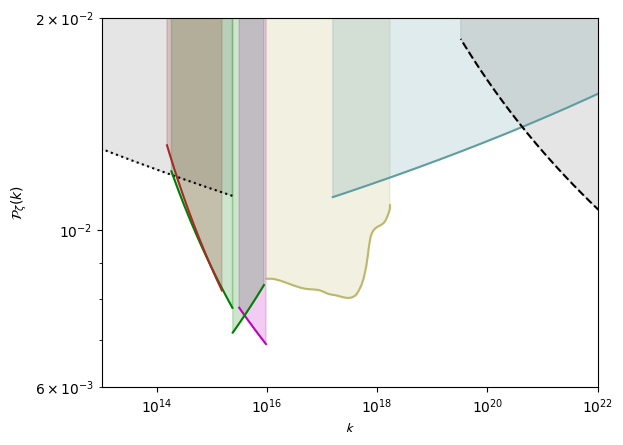

In [ ]:
plt.loglog(functions.k_rad(M_n),A*sigma**2, "k:",label=r"$\Omega_{DM}$")
plt.fill_between(functions.k_rad(M_n), A*sigma**2, sigma*0+10, color='grey',alpha=0.2)

plt.loglog(functions.k_rad(M_bbn),A*sigma_bbn**2, "r", label="BBN",color = "darkkhaki")
plt.fill_between(functions.k_rad(M_bbn), A*sigma_bbn**2, sigma_bbn*0+10, color = "darkkhaki",alpha=0.2)

plt.loglog(functions.k_rad(M_an),A*sigma_an**2, "m", label="CMB anisotropies")
plt.fill_between(functions.k_rad(M_an), A*sigma_an**2, sigma_an*0+10, color='m',alpha=0.2)

plt.loglog(functions.k_rad(M_grb1),A*sigma_grb1**2, color = "g", label="EG GRB")
plt.fill_between(functions.k_rad(M_grb1), A*sigma_grb1**2, sigma_grb1*0+10, color='g',alpha=0.2)

plt.loglog(functions.k_rad(np.array(M_grb2)),A*sigma_grb2**2, color = "g")
plt.fill_between(functions.k_rad(np.array(M_grb2)), A*sigma_grb2**2, sigma_grb2*0+10, color='g',alpha=0.2)

plt.loglog(functions.k_rad(M_reio),A*sigma_reio**2, color = "brown",label = "Reionization")
plt.fill_between(functions.k_rad(M_reio), A*sigma_reio**2, sigma_reio*0+10, color='brown',alpha=0.2)

plt.loglog(functions.k_rad(M_lsp),A*sigma_lsp**2, color = "cadetblue",label = "LSP")
plt.fill_between(functions.k_rad(M_lsp), A*sigma_lsp**2, sigma_lsp*0+10, color='cadetblue',alpha=0.2)

plt.loglog(functions.k_rad(M_relic),A*sigma_relic**2, "k--",label=r"$\Omega_{DM}^{relic}$")
plt.fill_between(functions.k_rad(M_relic), A*sigma_relic**2, sigma_relic*0+10, color='grey',alpha=0.2)

plt.xlabel(r"$\mathcal{k}$")
plt.ylabel(r"$\mathcal{P}_\zeta(k)$")
plt.xlim([1e13,1e22])
plt.ylim([6e-3,2e-2])
plt.show()

In [ ]:
from scipy.optimize import fsolve

def k_MD(M):
    a_end_inf_rad = functions.a_endre(constants.rho_r0, constants.rho_end_inf)
    k_end = a_end_inf_rad * constants.H_end
    k_end_over_k_rad = (M/(7.1*10**-2*constants.gam_rad*(1.8*10**15/constants.H_end)))**(1/2)
    k = (k_end/k_end_over_k_rad)*constants.GeV*constants.metter_m1
    k = np.array(k)
    return k

def a_endinf(a_end_re,rho_end_re,rho_end_inf):
    return a_end_re*(rho_end_re/rho_end_inf)**(1./3)

k_md = np.array(k_MD(M_tot))

def get_k_Nreh(M, N_re, omega, gam_reh):
  def equation(p):
    x = p[0]
    return[1.9*10**-7*x**2*np.exp(-0.1*x**(-2/3))-beta_t]
  betas_reh = BfN.get_betas_reh_tot(N_re, omega, gam_reh)
  k_end_over_k_reh = (M_tot/(7.1*10**-2*gam_reh*(1.8*10**15/constants.H_end)))**(1/3)
  betas_full = functions.get_Betas_full(M)
  rho_end_inf = 3.*constants.M_pl**2.*constants.H_end**2.
  k = M*0
  sigma = M*0
  a_end_reh = functions.a_endre(constants.rho_r0,constants.rho_end_inf*np.exp(-3*N_re))
  a_end_inf = a_endinf(a_end_reh,constants.rho_end_inf*np.exp(-3*N_re),rho_end_inf)
  for i in range(len(M_tot)):
    if betas_reh[i] != betas_full[i]:
      k[i] = a_end_inf*constants.H_end*constants.GeV*constants.metter_m1/k_end_over_k_reh[i]
      sigma_try = (betas_reh[i]/0.05556)**(1/5)
      if sigma_try >= 0.005:
        sigma[i] = sigma_try
      else:
        beta_t = betas_reh[i]
        sigma[i] = fsolve(equation,[0.005])
    else:
        k[i] = k_md[i]
        sigma[i] = sigma_tot[i]
  return sigma, k

sigma_10k = get_k_Nreh(M_tot,10,0,1)[0]
k_10s = get_k_Nreh(M_tot,10,0,1)[1]
sigma_20k = get_k_Nreh(M_tot,20,0,1)[0]
k_20s = get_k_Nreh(M_tot,20,0,1)[1]
sigma_30k = get_k_Nreh(M_tot,30,0,1)[0]
k_30s = get_k_Nreh(M_tot,30,0,1)[1]

/usr/local/lib/python3.10/dist-packages/PBHBeta/BfN.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  dy[1] = 3**(1./2)*M_pl/((Om_0+(1-3*omega)*Om_ext-4.)*np.exp(ln_rho)**(1./2))


In [ ]:
k_md = KfN.k_MD(M_tot)
sigma_10k, k_10s = KfN.get_k_Nreh(M_tot,10,0,1)
sigma_20k, k_20s = KfN.get_k_Nreh(M_tot,20,0,1)
sigma_30k, k_30s = KfN.get_k_Nreh(M_tot,30,0,1)

/usr/local/lib/python3.10/dist-packages/PBHBeta/BfN.py:106: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 =  beta0*b*(1.-time/Delta_t)**(1./3)
/usr/local/lib/python3.10/dist-packages/PBHBeta/BfN.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  dy[1] = 3**(1./2)*M_pl/((Om_0+(1-3*omega)*Om_ext-4.)*np.exp(ln_rho)**(1./2))


<ipython-input-13-ffc59f52418d>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.loglog(k_md,B*sigma_tot**2,"k",label = "SBB",color='#0000FF')
<ipython-input-13-ffc59f52418d>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.loglog(k_10s[:567],(B*sigma_10k**2)[:567],"k",color='lime' ,label = r"$N_{\rm MD}=10$")
<ipython-input-13-ffc59f52418d>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.loglog(k_20s[:816],(B*sigma_20k**2)[:816],"k", label = r"$N_{\rm MD}=20$", color='red')
<ipython-input-13-ffc59f52418d>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt stri

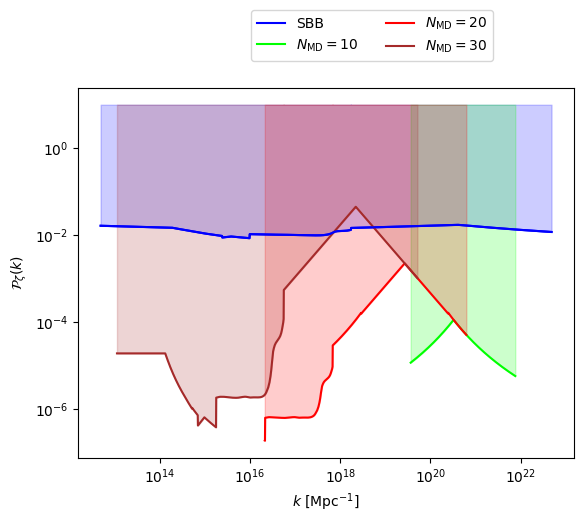

In [ ]:
B = 25/4

plt.loglog(k_md,B*sigma_tot**2,"k",label = "SBB",color='#0000FF')
plt.fill_between(k_md, B*sigma_tot**2, (B*sigma_tot**2)*0+10, color='#0000FF',alpha=0.2)

plt.loglog(k_10s[:567],(B*sigma_10k**2)[:567],"k",color='lime' ,label = r"$N_{\rm MD}=10$")
plt.fill_between(k_10s[:567], (B*sigma_10k**2)[:567], (B*sigma_10k**2)[:567]*0+10, color='lime',alpha=0.2)

plt.loglog(k_20s[:816],(B*sigma_20k**2)[:816],"k", label = r"$N_{\rm MD}=20$", color='red')
plt.fill_between(k_20s[:816], (B*sigma_20k**2)[:816], (B*sigma_20k**2)[:816]*0+10, color='red',alpha=0.2)

plt.loglog(k_30s[:1351],(B*sigma_30k**2)[:1351],"k", label = r"$N_{\rm MD}=30$", color='brown')
plt.fill_between(k_30s[:1351], (B*sigma_30k**2)[:1351], (B*sigma_30k**2)[:1351]*0+10, color='brown',alpha=0.2)

plt.loglog(k_md,B*sigma_tot**2,"k",color='#0000FF')


plt.xlabel(r"$k~[\rm{Mpc}^{-1}]$")
plt.ylabel(r"$\mathcal{P}_\zeta(k)$")
#plt.ylim([1e-7,1])
#plt.xlim(0.45e13,5.3e22)
plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.23))
plt.show()

In [ ]:
k_phys_rad = np.array(KfS.k_rad(M_tot))
sigma_5st, k_5st = KfS.get_k_SD(M_tot,5,1,1)
sigma_10st, k_10st = KfS.get_k_SD(M_tot,10,1,1)
sigma_15st, k_15st = KfS.get_k_SD(M_tot,15,1,1)

/usr/local/lib/python3.10/dist-packages/PBHBeta/BfS.py:83: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 =  beta0*b*(1.-time/Delta_t)**(1./3)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<ipython-input-18-a81b868d4f6f>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.loglog(k_phys_rad, A*sigma_tot**2, "k", color='black', label = "SBB")
<ipython-input-18-a81b868d4f6f>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.loglog(k_5st[:567],(C*sigma_5st**2)[:567],"r", color='red', label = r"$N_{\rm SD}=5$")
<ipython-input-18-a81b868d4f6f>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.loglog(k_10st[:818],(C*sigma_10st**2)[:818],"g", color='green',label = r"$N_{\rm SD}=10$")
<ipython-input-18-a81b868d4f6f>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and th

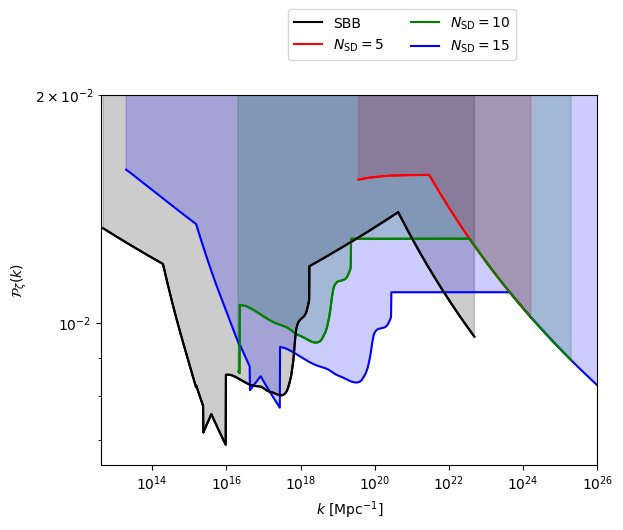

In [ ]:
C = (8/2)**2/4

plt.loglog(k_phys_rad, A*sigma_tot**2, "k", color='black', label = "SBB")
plt.fill_between(k_phys_rad, A*sigma_tot**2, [10]*len(A*sigma_tot**2), color='black',alpha=0.2)

plt.loglog(k_5st[:567],(C*sigma_5st**2)[:567],"r", color='red', label = r"$N_{\rm SD}=5$")
plt.fill_between(k_5st[:567], (C*sigma_5st**2)[:567], (C*sigma_5st**2)[:567]*0+10, color='red',alpha=0.2)

plt.loglog(k_10st[:818],(C*sigma_10st**2)[:818],"g", color='green',label = r"$N_{\rm SD}=10$")
plt.fill_between(k_10st[:820], (C*sigma_10st**2)[:820], (C*sigma_10st**2)[:820]*0+10, color='green',alpha=0.2)

plt.loglog(k_15st[:1320],(C*sigma_15st**2)[:1320],"b", color='blue',label = r"$N_{\rm SD}=15$")
plt.fill_between(k_15st[:1320], (C*sigma_15st**2)[:1320], (C*sigma_15st**2)[:1320]*0+10, color='blue',alpha=0.2)

plt.loglog(k_5st[:567],(C*sigma_5st**2)[:567],"r", color='red')
plt.loglog(k_10st[:819],(C*sigma_10st**2)[:819],"g", color='green')
plt.loglog(k_phys_rad, A*sigma_tot**2, "k", color='black')

plt.xlabel(r"$k~[\rm{Mpc}^{-1}]$")
plt.ylabel(r"$\mathcal{P}_\zeta(k)$")
plt.ylim([6.5e-3,2e-2])
plt.xlim([4.3e12,1e26])
plt.ylabel(r"$\mathcal{P}_\zeta(k)$")
plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.25))

plt.show()

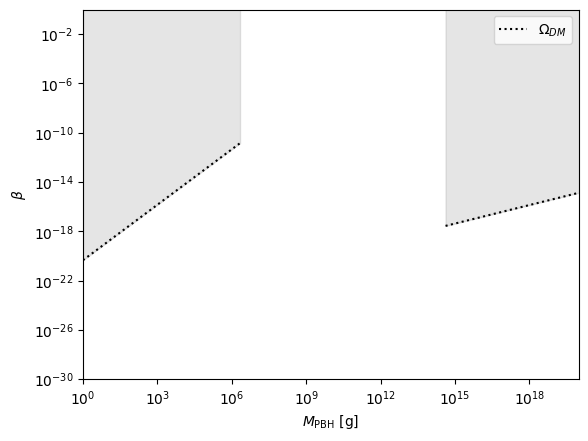

In [ ]:
plt.loglog(functions.Betas_DM(M_tot)[0],functions.Betas_DM(M_tot)[1], "k:",label=r"$\Omega_{DM}$")
plt.fill_between(functions.Betas_DM(M_tot)[0],functions.Betas_DM(M_tot)[1], functions.Betas_DM(M_tot)[1]*0+10, color='grey',alpha=0.2)
plt.loglog(functions.Betas_DM(M_tot)[2],functions.Betas_DM(M_tot)[3], "k:")
plt.fill_between(functions.Betas_DM(M_tot)[2],functions.Betas_DM(M_tot)[3], functions.Betas_DM(M_tot)[3]*0+10, color='grey',alpha=0.2)

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.xlim([1,1e20])
plt.ylim([1e-30,1])

plt.legend()
plt.show()

In [ ]:
functions.get_Betas_full(M_tot)

array([4.49001607e-21, 4.68487378e-21, 4.88818794e-21, ...,
       1.31614339e-15, 1.33491375e-15, 1.35395181e-15])

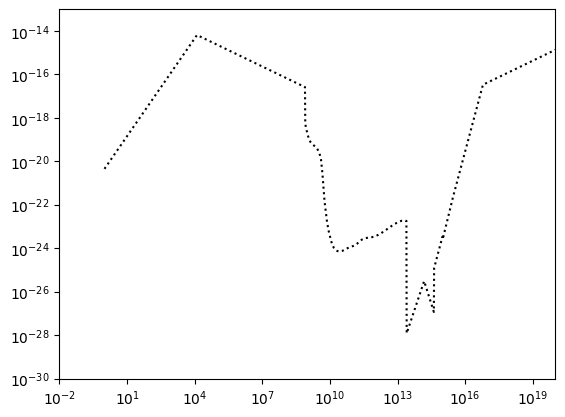

In [ ]:
plt.loglog(M_tot,constraints.betas_full,"k:")
plt.ylim([1e-30,1e-13])
plt.xlim([1e-2,1e20])

plt.show()

##### Realizar Cálculos de Abundancias a traves de una función tal que:

$$\beta = \beta\left(N_{\rm reh}, \omega, γ_{\rm reh}\right)$$

##### Dentro del codigo esta función está definida de la siguiente manera:
######  BfN.get_betas_reh_tot(N_re, omega, gam_reh):

##### La siguiente linea de código permite graficar los resultados con base a un arreglo de masas de PBHs; llamado **data_M_tot**, dicho arreglo esta siendo invocado desde el modulo **constraints**.

/usr/local/lib/python3.10/dist-packages/PBHBeta/BfN.py:106: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 =  beta0*b*(1.-time/Delta_t)**(1./3)
/usr/local/lib/python3.10/dist-packages/PBHBeta/BfN.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  dy[1] = 3**(1./2)*M_pl/((Om_0+(1-3*omega)*Om_ext-4.)*np.exp(ln_rho)**(1./2))


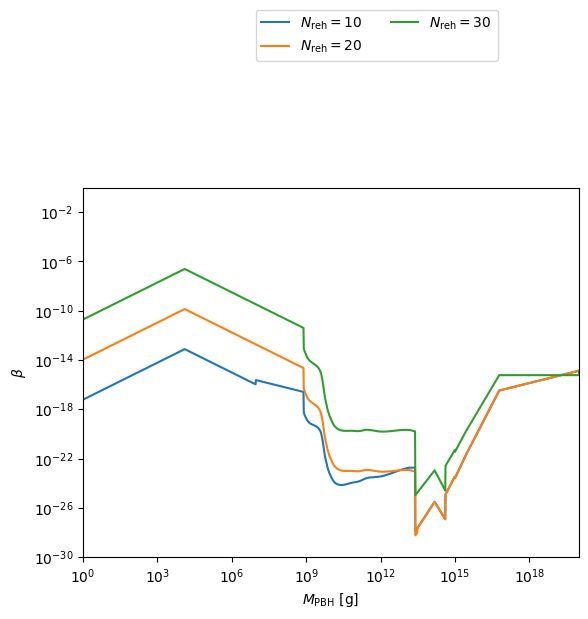

In [ ]:
plt.loglog(M_tot,BfN.get_betas_reh_tot(10,0,1),label = r"$N_{\rm reh}=10$")
plt.loglog(M_tot,BfN.get_betas_reh_tot(20,0,1),label = r"$N_{\rm reh}=20$")
plt.loglog(M_tot,BfN.get_betas_reh_tot(30,0,1),label = r"$N_{\rm reh}=30$")
plt.ylim([1e-30,1])
plt.xlim([1,1e20])
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.5))
plt.show()

##### Realizar Cálculos de Abundancias a traves de una función tal que:  $$\beta = \beta\left(N_{\rm stiff}, \omega, \gamma_{\rm stiff}\right)$$

##### Dentro del codigo esta función está definida de la siguiente manera:
###### BfS.get_betas_stiff_tot(N_stiff, omega, gamma_stiff)

##### La siguiente linea de código permite graficar los resultados con base a un arreglo de masas de PBHs; llamado **data_M_tot**, dicho arreglo esta siendo invocado desde el modulo **constraints**.

/usr/local/lib/python3.10/dist-packages/PBHBeta/BfS.py:83: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 =  beta0*b*(1.-time/Delta_t)**(1./3)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


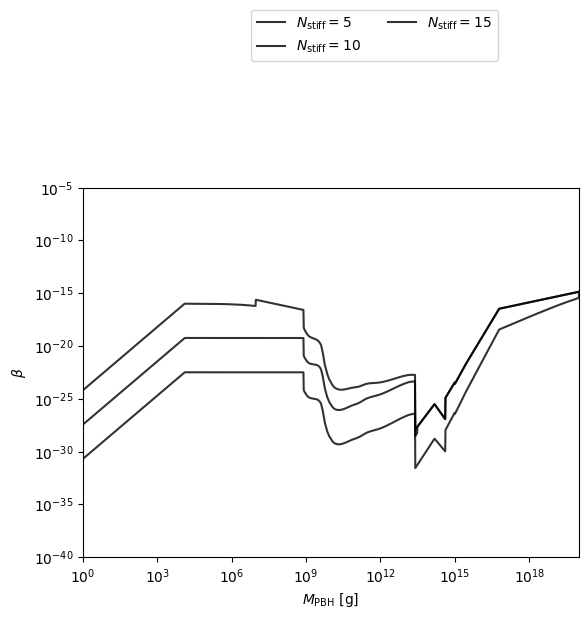

In [ ]:
plt.loglog(M_tot,BfS.get_betas_stiff_tot(5,1.,1.),"k",label = r"$N_{\rm stiff} = 5$",alpha = 0.8)
plt.loglog(M_tot,BfS.get_betas_stiff_tot(10,1.,1.),"k",label = r"$N_{\rm stiff} = 10$",alpha = 0.8)
plt.loglog(M_tot,BfS.get_betas_stiff_tot(15,1.,1.),"k",label = r"$N_{\rm stiff} = 15$",alpha = 0.8)
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.ylim([1e-40,1e-5])
plt.xlim([1,1e20])
plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.5))
plt.show()

In [ ]:
from scipy.optimize import fsolve

def get_k_reh(M, N_re, omega, gam_reh):
  def equation(p):
    x = p[0]
    return[1.9*10**-7*x**2*np.exp(-0.1*x**(-2/3))-beta_t]
  betas_reh = BfN.get_betas_reh_tot(N_re, omega, gam_reh)
  betas_full = functions.get_Betas_full(M)
  sigma = M*0
  for j in range(len(M)):
    if betas_reh[j] != betas_full[j]:
      sigma_try = (betas_reh[j]/0.05556)**(1/5)
      if sigma_try >= 0.005:
        sigma[j] = sigma_try
      else:
        beta_t = betas_reh[j]
        sigma[j] = fsolve(equation,[0.005])
    else:
      sigma[j] = sigma_tot[j]
  return sigma

sigma_10 = get_k_reh(M_tot,10,0,1)
sigma_20 = get_k_reh(M_tot,20,0,1)
sigma_30 = get_k_reh(M_tot,30,0,1)


B = 25/4
plt.loglog(M_tot,B*sigma_tot**2,"k",label = "SBB",color='#0000FF')
plt.fill_between(M_tot, B*sigma_tot**2, (B*sigma_tot**2)*0+10, color='#0000FF',alpha=0.2)

plt.loglog(M_tot[:567],(B*sigma_10**2)[:567],"k",color='lime' ,label = r"$N_{\rm MD}=10$")
plt.fill_between(M_tot[:567], (B*sigma_10**2)[:567], (B*sigma_10**2)[:567]*0+10, color='lime',alpha=0.2)

plt.loglog(M_tot[:816],(B*sigma_20**2)[:816],"k", label = r"$N_{\rm MD}=20$", color='red')
plt.fill_between(M_tot[:816], (B*sigma_20**2)[:816], (B*sigma_20**2)[:816]*0+10, color='red',alpha=0.2)

plt.loglog(M_tot,B*sigma_30**2,"k", label = r"$N_{\rm MD}=30$", color='brown')
plt.fill_between(M_tot, B*sigma_30**2, (B*sigma_30**2)*0+10, color='brown',alpha=0.2)

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\mathcal{P}_\zeta(k)$")
plt.ylim([1e-7,1])
plt.xlim([1,1e20])
plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.37))
plt.show()